# Анализ и прогнозирование временных рядов методами искусственного интеллекта

## **Практическая работа 4. Матричный профиль. Поиск примитивов на его основе.**

Смените рабочую директорию с помощью команды `chdir()`. Для этого передайте этой команде свой путь до каталога, в котором содержатся материалы четвертой практической работы. После выполнения этой команды все последующие операции с файлами и каталогами будут производиться относительно указанного каталога.

In [1]:
import os
practice_dir_path = os.getcwd()
os.chdir(practice_dir_path)

Выполните команды, которые автоматически перезагружают все импортированные модули при их изменении.

In [2]:
%load_ext autoreload
%autoreload 2

Импортируйте библиотеки и модули, необходимые для реализации практической работы 4.

In [3]:
# !pip install stumpy

In [4]:
import pandas as pd
import numpy as np
import os
import datetime

from modules.plots import *
from modules.mp import compute_mp
from modules.motifs import top_k_motifs
from modules.discords import top_k_discords
from modules.meter_swapping_detection import *

## **Часть 1.** Матричный профиль. Поиск мотивов и диссонансов.

### **Задача 1.**
Загрузите временной ряд, который содержит данные о почасовом потреблении электроэнергии некоторого итальянского города, снимаемые в течение 3 лет, начиная с 1 января 1995 года.

In [5]:
ts_url = './datasets/part1/italianpowerdemand.csv'

ts = pd.read_csv(ts_url, header=None).squeeze().to_numpy()

Визуализируйте временной ряд, используя функцию `plot_ts()` из модуля *plot.py*.

Анализ временных рядов на основе матричного профиля осуществляет библиотека [stumpy](https://stumpy.readthedocs.io/en/latest/index.html). Напишите функцию `compute_mp()` в модуле *mp.py*, которая вычисляет матричный профиль временного ряда на основе выбранной вами функции из библиотеки *stumpy*.

In [6]:
m = 165
excl_zone = int(np.ceil(m / 2))
mp = {}

# INSERT YOUR CODE
mp = compute_mp(ts, m, excl_zone)
mp

{'mp': mparray([2.6090936641684754, 2.5924180135436403, 2.5987763812474363, ...,
          2.00768186761169, 2.0206415581726054, 2.030675731612961],
         dtype=object),
 'mpi': mparray([3.2041765174460095, 3.2251291674875207, 3.264389872543432, ...,
          2.2976030474132276, 2.305913061730817, 2.3187101017735254],
         dtype=object),
 'm': 165,
 'excl_zone': 83,
 'data': {'ts1': array([127., 126., 120., ..., 143., 161., 151.]),
  'ts2': None}}

Визуализируйте найденный матричный профиль ряда.

In [7]:
plot_ts(mp['mp'], "Matrix Profile")

### **Задача 2.**
Выполните поиск top-$k$ мотивов в исходном временном ряде на основе построенного матричного профиля. Для этого реализуйте самостоятельно функцию `top_k_motifs()` в модуле *motifs.py*. Среди найденных мотивов не должно быть тривиальных совпадений, поэтому в `top_k_motifs()` добавьте вызов функции `apply_exclusion_zone()` из модуля *utils.py*.

In [8]:
top_k = 6
motifs = {}

top_k_idxs = stumpy.motifs(ts.astype(np.float64), mp['mp'], max_matches=top_k)[1][0]

motifs['indices'] = [sorted([top_k_idxs[i], top_k_idxs[i+1]]) for i in range(0, len(top_k_idxs)-1, 2)]

Выполните визуализацию найденных top-$k$ мотивов с помощью функции `plot_motifs()` из *plots.py*.

In [9]:
plot_motifs(mp, motifs)

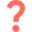
Проанализируйте и изложите содержательный смысл полученных результатов.

*# WRITE YOUR ANSWER*

### **Задача 3.**
Реализуйте самостоятельно функцию `top_k_discords()` в модуле *discords.py*, предназначенную для поиска top-$k$ диссонансов во временном ряде на основе матричного профиля. Чтобы исключить попадание тривиальных совпадений в результирующее множество диссонансов воспользуйтесь функцией `apply_exclusion_zone()` из модуля *utils.py*.

Загрузите временной ряд *nyc_taxi.csv* из директории *./datasets/part1/*, содежащий данные о среднем числе пассажиров NY такси за осень 2014 года.

In [10]:
ts_url = './datasets/part1/nyc_taxi.csv'

ts = pd.read_csv(ts_url, index_col=0, header=0).squeeze().to_numpy()
plot_ts(ts, "Input time series")

In [11]:
m = 96
excl_zone = int(np.ceil(m / 2))
mp = {}

mp = compute_mp(ts.astype(np.float64), m, excl_zone)
np.array([])
np.argsort(mp['mp'])

mparray([2636, 2300, 2662, ..., 9984, 9986, 9985])

In [12]:
top_k = 15
discords = {}

top_k_idxs = []
argsort_mp = np.argsort(mp['mp'])
for i in range (1, len(argsort_mp)+1):
  idx = argsort_mp[-i]
  flag =True
  for top_k_idx in top_k_idxs:
      if abs (top_k_idx - idx) < excl_zone:
        flag = False
  if flag:
      top_k_idxs.append(idx)
  if len (top_k_idxs) == top_k:
      break
print(top_k_idxs)

discords['indices'] = top_k_idxs

[np.int64(9985), np.int64(10048), np.int64(8784), np.int64(10097), np.int64(8837), np.int64(5868), np.int64(105), np.int64(9651), np.int64(8449), np.int64(5954), np.int64(7107), np.int64(154), np.int64(8396), np.int64(8640), np.int64(2930)]


Выполните визуализацию найденных top-$k$ диссонансов.

In [13]:
plot_discords(mp, discords)

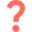
Проанализируйте и изложите содержательный смысл полученных результатов.

*# WRITE YOUR ANSWER*

## **Часть 2.** Сегментация повторяющихся активностей.

### **Задача 4.**

Загрузите временной ряд PAMAP *pamap.csv* из директории *./datasets/part2/*, представляющий собой показания закрепленного на человеке виброакселерометра. Данный ряд включает показания, снятые при выполнении человеком трех видов физической активности: ходьба, подъем по лестнице и спуск по лестнице. Необходимо сегментировать временной ряд на основе его матричного профиля для определения того, когда человек шел и когда поднимался/спускался. Поскольку подъем и спуск по лестнице – это схожие действия, поэтому будем считать, что это одна активность.  

In [14]:
ts_url = './datasets/part2/pamap.csv'

ts = pd.read_csv(ts_url, header=None).squeeze().to_numpy()

Визуализируйте временной ряд PAMAP.

In [15]:
plot_ts(ts, "Input time series")

Найдите и визуализируйте матричный профиль временного ряда.

In [16]:
m = 100
excl_zone = m
mp = {}

mp = compute_mp(ts, m, excl_zone)

In [17]:
plot_ts(mp['mp'], "Matrix Profile")

Вычислите порог по формуле, которая представлена в презентации [04 Matrix profile.pdf](https://github.com/mzym/TimeSeriesCourse/blob/main/slides/04%20Matrix%20profile.pdf).

In [18]:
threshold = 0

df = pd.DataFrame([mp['mp'], mp['mpi']]).T
df = df.loc[df[0] != np.inf]
#матричный профиль и индексы матричного профиля
mp['mp'] = np.array(df[0])
mp['mpi'] = np.array(df[1])

Выполните визуализацию результатов сегментации повторяющихся активностей.

In [19]:
plot_segmentation(mp, threshold)

Загрузите истинную разметку временного ряда PAMAP *pamap_labels.csv*, где 0 означает ходьбу, 1 – подъем по лестнице, 2 – спуск с лестницы. Вычислите точность по метрике accuracy, сравнив полученные результаты по основе матричного профиля с истинной разметкой.

In [20]:
labels_url = './datasets/part2/pamap_labels.csv'

labels = pd.read_csv(labels_url, header=None).squeeze().to_numpy()

In [21]:
from sklearn.metrics import accuracy_score

#валидация процесса
labels = np.where(labels==2, 1, labels)
labels = labels[m:]
labels = labels[sorted(mp['mpi'].astype(int))]

#ычислияем точность по метрике accuracy
labels_pred = (mp['mp'] < threshold).astype(int)
accuracy_score(labels, labels_pred)

0.0

## **Чaсть 3.** Casy Study: Раскрытие краж электричества подменой счетчиков (meter-swapping detection).


### **Задача 5.**

Рассмотрим практическое применение использования матричного профиля для решения задачи, связанной с раскрытием краж электричества путем подмены счетчиков.

Загрузите временные ряды из директории *./datasets/part3/*, которые были выбраны случайным образом из набора данных (House 1, 2, 3, 4 и 11), содержащего данные потребления электроэнергии 20 жилых домов в Великобритании с 1 января по 23 декабря 2014 года.

In [22]:
path = './datasets/part3/'

house_idx = [1, 2, 3, 4, 11]

filenames = [f"House{i}.csv" for i in house_idx]

consumptions = {}
for house in filenames:
    consumptions[house[:-4]] = pd.read_csv(os.path.join(path, house), header=None, index_col=0)
    consumptions[house[:-4]].index = pd.to_datetime(consumptions[house[:-4]].index, format="%Y-%m-%d %H:%M:%S")

consumptions

{'House1':                                1
 0                               
 2014-01-01 00:00:00  1422.005576
 2014-01-01 01:00:00  1707.948669
 2014-01-01 02:00:00  1442.025253
 2014-01-01 03:00:00  1374.657191
 2014-01-01 04:00:00  1757.285235
 ...                          ...
 2014-12-30 19:00:00   775.627087
 2014-12-30 20:00:00   475.499072
 2014-12-30 21:00:00   513.735568
 2014-12-30 22:00:00   659.945896
 2014-12-30 23:00:00   413.411215
 
 [8736 rows x 1 columns],
 'House2':                                1
 0                               
 2014-02-13 16:00:00   783.505155
 2014-02-13 17:00:00          NaN
 2014-02-13 18:00:00          NaN
 2014-02-13 19:00:00   241.000000
 2014-02-13 20:00:00  1102.175000
 ...                          ...
 2014-12-30 19:00:00   138.643810
 2014-12-30 20:00:00    95.211429
 2014-12-30 21:00:00   119.654649
 2014-12-30 22:00:00   157.086304
 2014-12-30 23:00:00    83.236742
 
 [7688 rows x 1 columns],
 'House3':                              

Далее смоделируем событие замены счетчика. Для этого каждый временной ряд разделим на две части: "Head" (до 1 октября) и "Tail" (после 1 октября). После чего выберем случайным образом 2 временных ряда (например, House1 и House11) и поменяем местами их "Tail" части.

In [23]:
cutoff = pd.to_datetime('2014-10-01')
heads, tails = heads_tails(consumptions, cutoff, house_idx)

# Swap Heads and Tails of 1 and 11
swap1, swap2 = 1, 11
consumptions[f'House{swap1}'] = pd.concat([heads[f'H_{swap1}'], tails[f'T_{swap2}']])
consumptions[f'House{swap2}'] = pd.concat([heads[f'H_{swap2}'], tails[f'T_{swap1}']])

heads, tails = heads_tails(consumptions, cutoff, house_idx)

heads

{'H_1':                                1
 0                               
 2014-01-01 00:00:00  1422.005576
 2014-01-01 01:00:00  1707.948669
 2014-01-01 02:00:00  1442.025253
 2014-01-01 03:00:00  1374.657191
 2014-01-01 04:00:00  1757.285235
 ...                          ...
 2014-09-30 19:00:00   183.115942
 2014-09-30 20:00:00   235.133945
 2014-09-30 21:00:00   181.379747
 2014-09-30 22:00:00   200.409009
 2014-09-30 23:00:00   185.529081
 
 [6552 rows x 1 columns],
 'H_2':                                1
 0                               
 2014-02-13 16:00:00   783.505155
 2014-02-13 17:00:00          NaN
 2014-02-13 18:00:00          NaN
 2014-02-13 19:00:00   241.000000
 2014-02-13 20:00:00  1102.175000
 ...                          ...
 2014-09-30 19:00:00   592.727924
 2014-09-30 20:00:00   344.297619
 2014-09-30 21:00:00   376.567033
 2014-09-30 22:00:00  1043.671024
 2014-09-30 23:00:00   616.574561
 
 [5504 rows x 1 columns],
 'H_3':                               1
 0    

Визуализируйте исходные временные ряды и параллельную оси OY прямую, которая делит временные ряды на "Head" и "Tail" части.

In [24]:
plot_consumptions_ts(consumptions, cutoff, house_idx)

Чтобы найти переставленную пару временных рядов, выполним следующее. Сначала составим временные ряды $H_i$ из всевозможных комбинаций "Head" и "Tail" частей исходных временных рядов $T_K$, где $1 \leq i \leq |T|^2$, $1 \leq K \leq |T|$. В нашем случае, $|T| = 5$.  Далее среди них найдем такую пару временных рядов $(H_i, H_j)$, которая имеет минимальную оценку $swap\_score$. Минимальная оценка $swap\_score$ для пары рядов $(H_i, H_j)$ вычисляется следующим образом:

\begin{equation}
swap\_score(i,j) = \frac{\min{(Head_{H_i} \bowtie Tail_{H_j})}}{\min{(Head_{H_i} \bowtie Tail_{H_i})}+eps},
\end{equation}

где $\bowtie$ – операция нахождения матричного профиля между двумя временными рядами. Матричный профиль между двумя временными рядами содержит расстояния между всеми подпоследовательностями первого временного ряда и их ближайшими соседями, которые являются подпоследовательностями второго временного ряда.

Добавьте в функцию `compute_mp()` в модуле *mp.py* поддежку вычисления матричного профиля между двумя различными временными рядами и найдите пару временных рядов $(H_i, H_j)$, которая имеет минимальную оценку $swap\_score$ среди всех пар.

In [25]:
m = 24 * 4

min_score = meter_swapping_detection(heads, tails, house_idx, m)

min_score

c:\ProgramData\miniconda3\Lib\site-packages\stumpy\core.py:2257: RuntimeWarning:

divide by zero encountered in divide

c:\ProgramData\miniconda3\Lib\site-packages\stumpy\core.py:3703: UserWarning:

Arrays T_A, T_B are not equal, which implies an AB-join. `ignore_trivial` has been automatically set to `False`.



{'i': 11,
 'j': 1,
 'mp_j': {'mp': mparray([6.645445015139523, 6.646133462166893, 6.518721078147909, ...,
           5.347154576581177, 5.373268489734636, 5.2849834262799105],
          dtype=object),
  'mpi': mparray([156, 157, 158, ..., 359, 360, 361], dtype=object),
  'm': 96,
  'excl_zone': None,
  'data': {'ts1': array([1186.77625571, 1474.35117057, 1503.19866444, ...,  184.63666667,
           170.44481605,  190.0506993 ]),
   'ts2': array([ 178.09817352,  173.54421769,  127.82004556, ..., 1024.07350097,
           237.40970874,  332.05620155])}}}

In [26]:
min_i, min_j, mp_j = min_score['i'], min_score['j'], min_score['mp_j']
print(f'Time series with minimum score is (H_{min_i}, T_{min_j}).')

Time series with minimum score is (H_11, T_1).


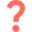
Проанализируйте и изложите содержательный смысл полученных результатов.

Полученный результат "Time series with minimum score is (H_11, T_1)" указывает на то, что пара временных рядов (H_11, T_1) имеет минимальный `swap_score`. Давайте разберем, что это означает и каков содержательный смысл этого результата.

### Содержательный смысл:

**Минимальный `swap_score`**:
   - `swap_score` — это метрика, которая сравнивает матричный профиль между двумя временными рядами. В данном случае, `swap_score` для пары (H_11, T_1) является минимальным среди всех возможных пар.
   - Чем меньше `swap_score`, тем более похожи временные ряды друг на друга.

**Пара (H_11, T_1)**:
   - `H_11` — это временной ряд для "Head" дома с индексом 11.
   - `T_1` — это временной ряд для "Tail" дома с индексом 1.